<a href="https://colab.research.google.com/github/abhinavpy/Tensorflow-Keras-Tutorials/blob/master/Keras_Regression_for_Deep_Neural_Networks_with_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv", na_values = ['NA','?'])

print(df.head())
print(df.shape)

   id job area   income  ...  pop_dense  retail_dense     crime  product
0   1  vv    c  50876.0  ...   0.885827      0.492126  0.071100        b
1   2  kd    c  60369.0  ...   0.874016      0.342520  0.400809        c
2   3  pe    c  55126.0  ...   0.944882      0.724409  0.207723        b
3   4  11    c  51690.0  ...   0.889764      0.444882  0.361216        b
4   5  kl    d  28347.0  ...   0.744094      0.661417  0.068033        a

[5 rows x 14 columns]
(2000, 14)


In [0]:
# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

In [0]:
# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                       patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)

W0708 09:25:41.480862 139897716647808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 1s - loss: 1602.0956 - val_loss: 1232.4730
Epoch 2/1000
1500/1500 - 0s - loss: 877.7926 - val_loss: 488.4487
Epoch 3/1000
1500/1500 - 0s - loss: 371.0667 - val_loss: 287.8026
Epoch 4/1000
1500/1500 - 0s - loss: 279.2906 - val_loss: 251.4105
Epoch 5/1000
1500/1500 - 0s - loss: 239.0856 - val_loss: 212.7134
Epoch 6/1000
1500/1500 - 0s - loss: 195.9671 - val_loss: 173.6306
Epoch 7/1000
1500/1500 - 0s - loss: 156.1073 - val_loss: 138.7008
Epoch 8/1000
1500/1500 - 0s - loss: 123.3469 - val_loss: 111.5052
Epoch 9/1000
1500/1500 - 0s - loss: 97.4037 - val_loss: 91.0514
Epoch 10/1000
1500/1500 - 0s - loss: 78.0966 - val_loss: 74.3427
Epoch 11/1000
1500/1500 - 0s - loss: 63.5164 - val_loss: 62.3508
Epoch 12/1000
1500/1500 - 0s - loss: 52.9783 - val_loss: 53.9389
Epoch 13/1000
1500/1500 - 0s - loss: 45.1159 - val_loss: 46.1581
Epoch 14/1000
1500/1500 - 0s - loss: 38.5517 - val_loss: 40.5754
Epoch 15/1000
1500/1500 - 0s - los

## Mean Square Error 
The mean square error is the sum of the squared differences between the prediction y^ and the expected y. MSE values are not a particular unit. If an MSE value has decreased for a model, that is good. However, beyond this, there is not much more you can determine. Low MSE values are desired. 

In [8]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE Error
score = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.6376062035423457


## Root Mean Squared Error 
The root mean squared error is essentially the square root of the MSE. Because of this the RMSE Error is in the same units as the training data outcome. Low RMSE values are desired.

In [9]:
import numpy as np

# Measure RMSE Error, RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7985024756018893


## Lift Chart
To generate a lift chart, perform the following activities:


*   Sort the data by expected output. Plot the blue line above. 
*   For every point on the x-axis, plot the predicted value for that same data-point. This is the green line above. 
*   The x-axis is just 0 - 100% of the dataset. The expected always starts low and ends high.
*   The y-axis is ranged according to the values predicted.

### Reading a Lift Chart
*   The expected and predicted lines should be very close to each other. 
*   The below chart is the most accurate on the lower age.



In [0]:
# Regression Chart
from matplotlib import pyplot as plt
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  plt.plot(t['y'].tolist(), label = 'expected')
  plt.plot(t['pred'].tolist(), label = 'prediction')
  plt.ylabel('output')
  plt.legend()
  plt.show()

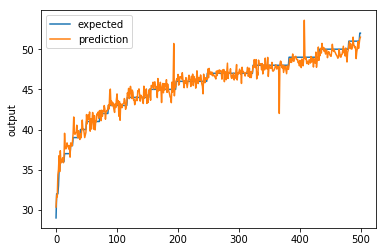

In [13]:
# Plot the chart
chart_regression(pred.flatten(), y_test)